# Introduction to Topic Modeling

In today's lesson, we're going to be working on method of text analysis called "topic modeling".

- [Part 1: What is a topic model?](#Part-1:-What-is-a-topic-model?)
- [Part 2: Topic Modeling Historical *New York Times* Obituaries (1852-2007)](#Part-2:-Topic-Modeling-Historical-*New-York-Times*-Obituaries-(1852-2007))
- [Part 3: Visualizing topic modeling results](#Part-3:-Visualizing-topic-modeling-results)



## Part 1: What is a topic model?

![image](../_images/blei-lda.png)
From David Blei, "Probablistic topic modeling" (2012)

How do I "topic model"?

1. [**MALLET: MAchine Learning for LanguagE Toolkit**](http://mallet.cs.umass.edu/index.php)
    - ![image](../_images/MALLET.png)


2. **David Mimno's in-browswer topic model:**
    - ![image](../_images/mimno-browser1.png)

    - ![image](../_images/mimno-browser2.png)


3. **Today: Topic Modeling using MALLET within Python**

A Note:
1. You can follow along with today's tutiral in Binder
2. You can download this notebook and run it on your own machine.

If you are running this notebook in the cloud, all of the necessary software has already been downloaded. 

If you are running this notebook locally, you need to have a few things installed:
- See [Instructions on how to install Java Development Kit, MALLET,  little_mallet_wrapper and seaborn](https://github.com/sceckert/IntroDHFall2022/blob/main/_week9/topic-modeling-set-up-instructions.md)



## Part 2: Topic Modeling Historical *New York Times* Obituaries (1852-2007)

## Let's get started!

In this particular lesson, we’re going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/index.php), to topic model 379 obituaries of significant historical figures published by *The New York Times*. This dataset is based on data originally collected by Matt Lavin for his Programming Historian [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf). Melanie Walsh cleaned the obituaries so that the subject’s name and death year is included in each text file name, added 13 more “Overlooked” obituaries, including Karen Spärck Jones, the computer scientist who introduced TF-IDF. 

This dataset can be found on our GitHub page under "_datasets/texts/history/NYT-Obituaries"


## Import Packages

In [1]:
!pip install little_mallet_wrapper

You should consider upgrading via the '/Users/sceckert/anaconda3/bin/python -m pip install --upgrade pip' command.


In [45]:
!pip install scipy

You should consider upgrading via the '/Users/sceckert/anaconda3/bin/python -m pip install --upgrade pip' command.


In [46]:
import little_mallet_wrapper
import seaborn
import glob
import os
import scipy
from pathlib import Path

## Set the path to MALLET
Note: if you're running this notebook on your *local* machine, you need to replace the path below with the path to mallet on your own machine. Run the cell below

In [3]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

## Define our corpus of texts
In this workshop, we'll be working on a dataset of NYT Obituaries, produced by Matt Lavin as part of his TF-IDF workshop, with a few recent additions added by Melanie Walsh

In [4]:
# Make a variable and assign it to the path to our directory that contains our text files
directory = "../_datasets/NYT-Obituaries/"

Using the `glob` function and the wildcard `*`, we're going to make a list of all the text files in our directory.

In [5]:
files = glob.glob(f"{directory}/*.txt")

In [6]:
files

['../_datasets/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../_datasets/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../_datasets/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../_datasets/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../_datasets/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../_datasets/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../_datasets/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../_datasets/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../_datasets/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../_datasets/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../_datasets/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../_datasets/NYT-Obituaries/1989-Ferdinand-Marcos.txt',
 '../_datasets/NYT-Obituaries/1991-Martha-Graham.txt',
 '../_datasets/NYT-Obituaries/1997-Deng-Xiaoping.txt',
 '../_datasets/NYT-Obituaries/1938-George-E-Hale.txt',
 '../_datasets/NYT-Obituaries/1885-Ulysses-Grant.txt',
 '../_datasets/NYT-Obituaries/1909-Sarah-Orne-Jewett.txt',
 '../_datasets/NYT-Obituaries/1957-Christian-Dior.txt',
 

## Process our text files
Next we're going to use the wrapper "little_mallet_wrapper" to process our text files and create two variables, "training_data" and "original_texts". We'll be using these variables to tell MALLET what to use as training data, and a copy of our original texts that we can refer back to.

The code we'll use to run this is: `little_mallet_wrapper.process_string(text, numbers='remove')`

 First, we're going to create an empty string, and then iterate over all the files in our `files` variable, processing each of them with the function `little_mallet_wrapper.process_string(text, numbers='remove')`, which takes all our text, makes the text lowercase, removes stopwords

> For the list of stopwords that mallet removes, and to change them, look inside the directory "mallet-2.0.8/stoplists"  
> What implications might that have for our model?

In [7]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [8]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

## Process the titles of obituaries
Since our text files all contain the year and name of the individual in them, we're going to use the filename as part of the way we label the text of that obituary.

In [9]:
obit_titles = [Path(file).stem for file in files]
# The Path().stem function extract the filename without the .txt extension

In [10]:
obit_titles

['1945-Adolf-Hitler',
 '1915-F-W-Taylor',
 '1975-Chiang-Kai-shek',
 '1984-Ethel-Merman',
 '1953-Jim-Thorpe',
 '1964-Nella-Larsen',
 '1955-Margaret-Abbott',
 '1984-Lillian-Hellman',
 '1959-Cecil-De-Mille',
 '1928-Mabel-Craty',
 '1973-Eddie-Rickenbacker',
 '1989-Ferdinand-Marcos',
 '1991-Martha-Graham',
 '1997-Deng-Xiaoping',
 '1938-George-E-Hale',
 '1885-Ulysses-Grant',
 '1909-Sarah-Orne-Jewett',
 '1957-Christian-Dior',
 '1987-Clare-Boothe-Luce',
 '1976-Jacques-Monod',
 '1954-Getulio-Vargas',
 '1979-Stan-Kenton',
 '1990-Leonard-Bernstein',
 '1972-Jackie-Robinson',
 '1998-Fred-W-Friendly',
 '1991-Leo-Durocher',
 '1915-B-T-Washington',
 '1997-James-Stewart',
 '1981-Joe-Louis',
 '1983-Muddy-Waters',
 '1942-George-M-Cohan',
 '1989-Samuel-Beckett',
 '1962-Marilyn-Monroe',
 '2000-Charles-M-Schulz',
 '1967-Gregory-Pincus',
 '1894-R-L-Stevenson',
 '1978-Bruce-Catton',
 '1982-Arthur-Rubinstein',
 '1875-Andrew-Johnson',
 '1974-Charles-Lindbergh',
 '1964-Rachel-Carson',
 '1953-Marjorie-Rawlings',


## Get Statistics on our Training Dataset
The `little_mallet_wrapper.print_dataset_stats()` function gives us some basic statistics on the dataset we want to use as our training data.

In [11]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


## Training the Topic Model
Now for the big part!  We're going to use the variables we defined.
Before we can do that, we need to define some variables. We need to tell our model:

- How many topics to find
- What our training data is
- The location of a directory to output our topic modeling data (including sub-directories

And we need to import all this information into Little MALLET Wrapper



### Set the Number of Topics

In [12]:
num_topics = 15 # Change this number to change the number of topics

### Set the Training Data

In [13]:
training_data = training_data

### Set the Location of the Topic Model Output Files

Topic modeling produces a lot of output files, including the words in topics, and statistics on their relative distributions within the documents. We need to tell Little MALLET Wrapper where to output all of these results. The code below defines a directory called “topic-model-output” and a subdirectory called “NYT-Obits”, all of which will be inside your current directory. 

Notice how we're able to us re-use the path we defined, "output_directory_path" to tell Little MALLET Wrapper where to upt each of the 5 output files.

In [14]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/NYT-Obits'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'



### Import our Data into Little MALLET Wrapper
Here we're importing the variables we just defined into Little MALLET Wrapper

In [15]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


### Train the Topic Model

The final and most important step: we're going to use `little_mallet_wrapper.train_topic_model()` to train our model (using all of the parameters that we just defined. The topic model should take about 45 seconds to 1 minute to fully train and complete. 

If you're running this notebook locally (not in the cloud), you can look at your Terminal or PowerShell while it’s running and see what the model looks like as it trains.

In [16]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...
Complete


## Display Topics and Top Words
To examine the 15 topics that the topic model extracted from the NYT obituaries, run the cell below. This code uses the `little_mallet_wrapper.load_topic_keys()` function to read and process the MALLET topic model output from your computer, specifically the file “mallet.topic_keys.15”.

Take a look at the topics below. Think about what each topic seems to capture. 

- Are there any that seem to have a clear theme? 
- What about any oddities or outliers?

In [17]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['company', 'business', 'times', 'new', 'york', 'paper', 'ochs', 'ford', 'oil', 'rockefeller', 'pulitzer', 'newspaper', 'building', 'carnegie', 'hill', 'getty', 'barnum', 'chattanooga', 'sloan', 'editorial']

✨Topic 1✨

['music', 'band', 'jazz', 'musical', 'piano', 'sinatra', 'composer', 'goodman', 'orchestra', 'concert', 'stravinsky', 'bernstein', 'armstrong', 'musicians', 'playing', 'songs', 'played', 'davis', 'hall', 'dance']

✨Topic 2✨

['would', 'one', 'time', 'could', 'life', 'never', 'said', 'great', 'man', 'people', 'made', 'much', 'even', 'way', 'part', 'however', 'first', 'came', 'make', 'many']

✨Topic 3✨

['miss', 'mrs', 'women', 'woman', 'husband', 'luce', 'york', 'sullivan', 'murrow', 'kennedy', 'keller', 'bell', 'graham', 'news', 'said', 'television', 'social', 'douglass', 'smith', 'suffrage']

✨Topic 4✨

['university', 'professor', 'science', 'research', 'scientific', 'child', 'oppenheimer', 'institute', 'atomic', 'children', 'schulz', 'work', 'theory', 'huma

----


## Exercise 1: Training topics

## Your Turn!!
1. Change the number of topics (`num_topics`) from 15 to some other number
2. Then, run command to train the topic model `little_mallet_wrapper.train_topic_model()`
3. Then, re-reun the code in the cell above to display the topics and top numbers.
4. How did your choice do you notice? What implications might this have for someone who wants to use a topic model?

When you're done, change the number of topics back to 15, and re-train the model.

----

## Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single obituary in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific obituaries.

To get the topic distributions, we’re going to use the little_mallet_wrapper.load_topic_distributions() function, which will read and process the MALLET topic model output, specifically the file “mallet.topic_distributions.15”, as a dataframe.

In [18]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

We can use this dataframe that we just created to look at the probability distributions of each of the 15 toipcs in on obituary.

Let's look at Marilyn Monroe's obituary, which is #32

In [19]:
topic_distributions[32]

[0.00026486982987854125,
 0.00014900084568986155,
 0.2795319088015739,
 0.05606148840740725,
 0.0001714940442329461,
 0.0001978013168500465,
 0.31264691428529884,
 0.0016969024611905375,
 0.0032200321834696573,
 0.2730287592655513,
 0.04242142043233118,
 0.014327984040528666,
 0.015700466630027447,
 0.00020029392599557047,
 0.0003806635299742203]

It's a little hard to get a sense of what these topics are, so we can pair this with the data we have on the title and the top words in the topic:

In [20]:
obituary_to_check = "1962-Marilyn-Monroe"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for 1962-Marilyn-Monroe

✨Topic 0 ['company', 'business', 'times', 'new', 'york', 'paper'] ✨
Probability: 0.0

✨Topic 1 ['music', 'band', 'jazz', 'musical', 'piano', 'sinatra'] ✨
Probability: 0.0

✨Topic 2 ['would', 'one', 'time', 'could', 'life', 'never'] ✨
Probability: 0.28

✨Topic 3 ['miss', 'mrs', 'women', 'woman', 'husband', 'luce'] ✨
Probability: 0.056

✨Topic 4 ['university', 'professor', 'science', 'research', 'scientific', 'child'] ✨
Probability: 0.0

✨Topic 5 ['war', 'hitler', 'israel', 'minister', 'german', 'peace'] ✨
Probability: 0.0

✨Topic 6 ['years', 'new', 'first', 'one', 'world', 'later'] ✨
Probability: 0.313

✨Topic 7 ['queen', 'prince', 'england', 'lord', 'lindbergh', 'victoria'] ✨
Probability: 0.002

✨Topic 8 ['soviet', 'mao', 'china', 'party', 'communist', 'stalin'] ✨
Probability: 0.003

✨Topic 9 ['film', 'movie', 'said', 'films', 'theater', 'hollywood'] ✨
Probability: 0.273

✨Topic 10 ['government', 'said', 'political', 'gandhi', 'many', 'new']

> **💡 CHECK-IN:**  
> Remember, these are PROBABILITIES. Each time that we re-run the model, the probabiliites will change slightly as the model trains.

> **EXERCISE**  
1. Run the "Train the Topic Model" command again
2. Then click on the cell above to output the topic distributions for Marylin Monroe's obituary. 
3. What do you notice? What changed? And what implications might this have for how we use these distribution statistics? 

## Part 3: Visualizing topic modeling results

### Create a Heatmap of Topics and Texts

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of target_labels, the sample of texts that we’d like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [37]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

If you’d like to make a random list of target labels, you can uncomment and run the cell below.

In [38]:
#import random
#target_labels = random.sample(obit_titles, 10)

Now let's use those target_labels to create a heatmap:

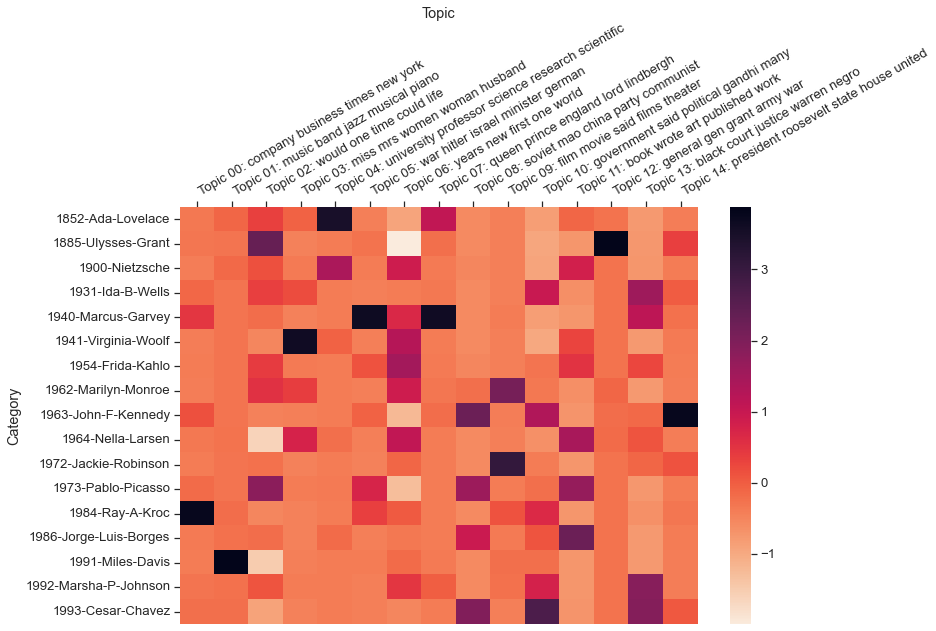

In [39]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics,
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )

The darker squares in this heatmap represent a high probability for the corresponding topic (compared to everyone else in the heatmap) and the lighter squares in the heatmap represent a low probability for the corresponding topic. For example, if you scan across the row of Marilyn Monroe, you can see a dark square for the topic “miss film theater movie theater broadway”. If you scan across the row of Ada Lovelace, an English mathematician who is now recognized as the first computer programmer, according to her NYT obituary, you can see a dark square for “university professor research science also”.

The `plot_categories_by_topics_heatmap()` function also helpfully outputs a PDF of the heatmap to `output_directory_path + '/categories_by_topics.pdf'`. We can download this PDF and explore it in more detail or embed it in an article or blog post!

In [24]:
from IPython.display import IFrame
IFrame("topic-model-output/NYT-obits/categories_by_topics.pdf", width=1000, height=600)

### Display Top Titles Per Topic
We can also display the obituaries that have the highest probability for every topic with the little_mallet_wrapper.get_top_docs() function.

Because most of the obituaries in our corpus are pretty long, however, it will be more useful for us to simply display the title of each obituary, rather than the entire document—at least as a first step. To do so, we’ll first need to make two dictionaries, which will allow us to find the corresponding obituary title and the original text from a given training document.

In [40]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

Then we’ll make our own function `display_top_titles_per_topic()` that will display the top text titles for every topic. This function accepts a given topic_number as well as a desired `number_of_documents` to display.

In [41]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_obit_titles[document] + "\n")
    return

NOTE: The number of the topic (eg Topic 2, Topic 11) does not correspond to its frequency in the corpus (there is no intrinsic difference between a topic that MALLET assigns as topic 0 and a topic that MALLET assigns as 15, it's just a labelling convention.

**Topic 10**

To display the top 5 obituary titles with the highest probability of containing Topic 10, we will run:

In [42]:
display_top_titles_per_topic(topic_number=10, number_of_documents=5)

✨Topic 10✨

['government', 'said', 'political', 'gandhi', 'many', 'new', 'moses', 'party', 'mrs', 'nation', 'people', 'would', 'india', 'public', 'often', 'leader', 'social', 'control', 'state', 'group']

0.491 1984-Indira-Gandhi

0.4147 1948-Mohandas-K-Gandhi

0.382 1981-Robert-Moses

0.3288 1973-Roberto-Clemente

0.2726 1952-Eva-Peron



What descriptive label would you give to Topic 10? Click the cell below to assign one

Topic 10 : [DOUBLE-CLICK HERE TO TYPE IN A LABEL]

**Topic 7**

To display the top 5 obituary titles with the highest probability of containing Topic 7, we will run:

In [28]:
display_top_titles_per_topic(topic_number=7, number_of_documents=5)

✨Topic 7✨

['queen', 'prince', 'england', 'lord', 'lindbergh', 'victoria', 'king', 'emperor', 'sir', 'london', 'english', 'schweitzer', 'duke', 'space', 'flight', 'royal', 'british', 'made', 'church', 'balfour']

0.3865 1901-Queen-Victoria

0.3724 1939-Pope-Pius-XI

0.3597 1972-The-Duke-of-Windsor

0.3582 1939-Howard-Carter

0.3013 1998-Alan-B-Shepard-Jr



Topic 7 : [DOUBLE CLICK HERE TO TYPE IN A LABEL]

**Topic 14**

To display the top 5 obituary titles with the highest probability of containing Topic 14, we will run:

In [29]:
display_top_titles_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['president', 'roosevelt', 'state', 'house', 'united', 'states', 'truman', 'republican', 'office', 'senator', 'political', 'governor', 'election', 'democratic', 'party', 'hoover', 'congress', 'campaign', 'senate', 'war']

0.5093 1944-Alfred-E-Smith

0.4761 1989-Claude-Pepper

0.4494 1945-FDR

0.4424 1987-Alf-Landon

0.4379 1961-Sam-Rayburn



Topic 14 : [DOUBLE-CLICK HERE TO TYPE IN A LABEL]

### Display Topic Words in Context of Original Text

Often it’s useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

To display the original obituary texts that rank highly for a given topic, with the relevant topic words **bolded** for emphasis, we are going to make the function `display_bolded_topic_words_in_context()`.

In the cell below, we’re importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words bolded, as well as the regular expressions library re, which will allow us to find and replace the correct words.

In [43]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        obit_title = f"**{training_data_obit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

**Topic 3**

To display the top 3 original obituaries with the highest probability of containing Topic 3 and with relevant topic words bolded, we will run:

In [44]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

✨Topic 3✨

['miss', 'mrs', 'women', 'woman', 'husband', 'luce', 'york', 'sullivan', 'murrow', 'kennedy', 'keller', 'bell', 'graham', 'news', 'said', 'television', 'social', 'douglass', 'smith', 'suffrage']



✨✨✨

**0.4002386963342803**

**1936-Anne-Macy**

October 21, 1936

 OBITUARY

 Mrs. Macy Is Dead; Aided Miss Keller

 BY THE NEW YORK TIMES

 Mrs. Anne Mansfield Sullivan Macy, who for nearly fifty years was the kindly, patient and brilliant teacher of Miss Helen Keller, noted blind and deaf **woman**, died yesterday at their home, 71-11 Seminole

 Avenue, Forest Hills, Queens. She had been suffering from a heart ailment, which became acute early this Summer. Mrs. Macy was 70 years old.

 Mrs. Macy taught Miss Keller to read, speak and know the world about her by use of her fingertips. Their lifelong devotion to each other was internationally famous and one was seldom seen or heard of without the other. Blindness, which had shadowed the child Anne Sullivan's life and which she had conquered before she met Miss Keller, had returned to darken her last days, and Miss Keller had to become the teacher and Mrs. Macy the pupil.

 Miss Keller yesterday paid this tribute: "Teacher is free at least from pain and blindness. I pray for strength to endure the silent dark until she smiles upon me again."

 Miss Polly Thompson, Miss Keller's secretary, **said** yesterday that Miss Keller was "bearing up magnificently" under her loss. During the last week Miss Keller was almost constantly at Mrs.

 Macy's side. Mrs. Macy was in a coma from Thursday until she died. On Wednesday she **said**: "Oh, Helen and Polly, my children, I pray God will unite us in His love."

 Mrs. Macy, so long the link to light for Miss Keller, lost the sight of her own right eye in 1929, due partly to a cataract, for which an operation was performed. In May, 1935, a cataract operation was done on her left eye, but thereafter she was able to distinguish only light and color with it. She could no longer read or guide her beloved Miss Keller, who, despite her own handicaps, devoted herself to her friend.

 Pupil Guides Teacher in Braille

 As early as 1933 Miss Keller had commenced to teach Mrs. Macy to read Braille. But the Braille system had changed since Mrs. Macy taught it to Miss Keller and the teacher found it difficult.

 When it became known that year that Miss Keller, who had been led out of the black silence in which she had existed since childhood by the ingenuity, perseverance and patience of her teacher, was in turn preparing her teacher to "see" with her fingers, THE NEW YORK TIMES, in an editorial, **said**: "The 'blind leading the blind' will henceforth have a new meaning wherever the story of Anne Sullivan and Helen Keller is known. They who have been exiled from the light have been able to demonstrate the power of the mind to overcome limitation."

 Mrs. Macy was 21 years old when she met Helen Keller. Born in Feeding Hills, near Springfield, Mass., on April 14, 1866, the daughter of Irish immigrants, John and Mary Mansfield Sullivan, Mrs. Macy suffered the loss of her mother when a young child. For a year or two she was supported by poor relatives, but at the age of 10 she was sent to the State Infirmary, Tewksbury, Mass.

 She was already partially blind and at the infirmary two eye operations were performed, but her sight did not improve. She was led to believe that Frank B. Sanborn, chairman of the State Board of Charities, who sometimes visited the infirmary, might be able to aid her. She pleaded with him and he arranged for her entry into the Perkins Institution for the Blind in Boston, where lived Laura Bridgman, blind and deaf, who had been trained there.

 Underwent Two Eye Operations

 Mrs. Macy entered the Perkins Institution in 1880, made there a brilliant scholastic record and learned to study with her fingers, and later, after two operations had restored her sight, to use her eyes.

 She learned the manual, or finger, alphabet, so as to be able to talk to Laura Bridgman. In 1886 she was graduated as valedictorian of her class.

 Not long after her graduation Helen Keller's father wrote to the institution asking for help for her. Miss Sullivan was chosen to be her teacher and, after familiarizing herself with the details of her new work, went to Helen's home in Tuscumbia,

 Ala.

 The two who were to mean so much to each other until Mrs. Macy's death yesterday met first on March 3, 1887, three months before Helen was 7 years old. Miss Keller **said** later that it was "the most important day I remember in all my life."

 Working carefully, so as to bring Helen under some sort of discipline without breaking her spirit, Mrs. Macy began spelling words into her hand. With no understanding of what they meant, Helen began repeating them.

 The teacher persisted, spelling the word doll when she gave her a doll, bread when she gave her bread, candy when she gave her candy. In less than a month Helen realized that everything had a name and that she had a way, the finger alphabet, of calling the names.

 Teaching Along New Paths

 One day Mrs. Macy tried to teach Helen the difference between a cup and the water in the cup. She took her to a pump, pumped water over one hand and spelled water into the other hand. Helen at last understood.

 She pointed to Miss Sullivan, who spelled teacher, and "teacher" she was to the close.

 Mrs. Macy educated Helen, using always the finger spelling, but treating her like any other child. After preliminary lessons in speaking, Helen learned from Mrs. Macy to converse and even speak from a platform.

 Teacher and pupil remained for a time at the Perkins Institution. Then, in 1894, Helen was enrolled in the Wright-Humason Oral School for the Deaf in New York. Later Miss Sullivan took her to a school in Cambridge to prepare her for Radcliffe College and finally Helen passed triumphantly her entrance examinations, entered Radcliffe and in 1904 was graduated cum laude.

 Throughout the college course Mrs. Macy was with Helen, spelling into her hands the words of the textbooks and the books of required reading. Miss Keller's career thereafter brought her more and more into the public eye. She became famous as an author, she raised huge sums for the blind, she traveled, she was everywhere acclaimed, and Mrs. Macy went everywhere with her. "My own life," Mrs. Macy **said** once, "is so interwoven with my Helen's life that I can't separate myself from her."

 Honored by Foreign Lands

 When Mrs. Macy's sixty-seventh birthday was celebrated Miss Keller proposed a toast: "Here's to my teacher, whose birthday was the Easter morning of my life."

 In 1931 Mrs. Macy received the honorary degree of Doctor of Humane Letters from Temple University and the Order of St. Sava from the King of Yugoslavia.

 In 1932 she became an honorary fellow of the Educational Institute of Scotland. Mrs. Macy stayed in seclusion for several months in 1933 in Scotland while Miss Keller nursed her. Mrs. Macy's blindness grew more pronounced and on her return from Scotland she **said**: "Helen is and always has been thoroughly well behaved in her blindness as well as her deafness, but I'm making a futile fight of it, like a bucking bronco. It's not the big things in life that one misses through loss of sight, but such little things as being able to read. And I have no patience, like Helen, for the Braille system, because I can't read fast enough."

 Early this month the Roosevelt Memorial Association announced that Roosevelt medals "for a cooperative achievement of heroic character and far-reaching significance" would be presented to Miss Keller and Mrs. Macy. In a telegram of sympathy to Miss Keller yesterday Hermann Hagedorn, executive director of the association, **said** that presentation to Miss Keller would be postponed from Oct. 27 to next year.

 Mrs. Macy was married to John Albert Macy, author and critic, in 1905. He died in 1932. There are no immediate survivors.

 A funeral service will be conducted at 2 P. M. tomorrow at the Park Avenue Presbyterian Church, 1,010 Park Avenue, by the Rev. Dr. Harry Emerson Fosdick and the Rev. Edmund M. Wylie, the pastor.

 After the service, cremation will take place, in accord with Mrs. Macy's wish, at the Fresh Pond Crematory, Queens.

 The honorary pallbearers will be M. C. Migel, president of the American Foundation for the Blind, which Miss Keller and Mrs. Macy greatly aided; Robert Irwin, executive director of the foundation; Harvey D. Gibson, Russell Doubleday, Dr. Conrad Berens,

 Dr. Philip S. Smith, Dr. William F. Saybolt, Dr. John H. Finley, Louis Bamberger, the Rev. Dr. Edward E. Allen, director emeritus of the Perkins Institution; Dr. William Allan Neilson, president of Smith College, and William Ziegler Jr.

 



✨Topic 3✨

['miss', 'mrs', 'women', 'woman', 'husband', 'luce', 'york', 'sullivan', 'murrow', 'kennedy', 'keller', 'bell', 'graham', 'news', 'said', 'television', 'social', 'douglass', 'smith', 'suffrage']



✨✨✨

**0.31548921148746034**

**1902-Elizabeth-Cady-Stanton**

October 27, 1902

 OBITUARY

 Elizabeth Cady Stanton Dies at Her Home

 By THE NEW YORK TIMES

 Mrs. Elizabeth Cady Stanton died at 3 o'clock yesterday afternoon at her home in the Stuart Apartment House, 250 West Ninety-fourth Street. Had she lived until the 12th of next month she would have completed her eighty-seventh year. Mrs. Stanton had been ailing for several months, but had not been seriously ill. Of recent years she became very stout, and this, combined with her naturally large frame, made the use of a cane necessary. Saturday she was confined to her bed. Though physically incapacitated, her mental powers were as much in evidence as ever, and only in the first part of the week she had written two articles for publication.

 Early on Saturday Mrs. Stanton dictated to her secretary a letter.

 Toward nightfall she lapsed into semi-consciousness and so continued until the end. Her son, Robert L. Stanton, and her daughter, Mrs. Margaret Lawrence, resided with their mother. Six children survive--Henry, Theodore,, Mrs. Margaret Lawrence, Mrs. Stanton

 Blatch, Robert L., and G. Smith Stanton. All reside in New York, except Theodore, who represents Harper's Weekly and several other American publications in Paris.

 The funeral will be held Wednesday and the interment will be at Woodlawn Cemetery.

 Mrs. Stanton was born Nov. 12, 1815, in Johnstown, N. Y. She was the daughter of Supreme Court Judge Daniel Cady and wife of the late Henry Brewster Stanton, noted abolitionist and journalist. She began her education at the Johnstown Academy, and later became a pupil at Emma Willard's Seminary, in Troy, a school noted then throughout the country. She was graduated with the class of '32. Eight years later, while attending a world's anti-slavery convention in London, she made the acquaintance of Lucretia Mott, which resulted in the joint issuance of a call for a **woman**'s rights convention. Mrs. Stanton was on her wedding trip at this time. The convention was held at her home, Seneca Falls, July 19 and 20, 1848.

 The first formal claim for **suffrage** for **women** was then made. In 1854 she appeared before the New York Legislature and addressed it on "The Rights of Married Women." Six years later she took the stand that drunkenness should constitute a cause for divorce. She was instrumental in having the question of **woman** **suffrage** submitted to Kansas in 1867 and Michigan in 1874. She was President of the National Committee of her party from 1855 to 1865. She was also identified with the Women's Loyal League and was President of the National Women's Suffrage Association unit 1883. In 1868 she sought to become an actual political factor by entering the lists for Congress. For the past quarter of a century and over she had annually addressed a committee of Congress in favor of an amendment for **women** to the Constitution of the United

 States. "At the time of her death she was honorary President of the National Women's Suffrage Association. Mrs. Stanton's mother was Margaret Livingston, a daughter of James Livingston, an officer in the American Army during the Revolution. Her father's ancestors came from Connecticut. Mrs. Stanton began to take a great interest in the laws as they applied to **women** by having access to her father's office, and in which she spent a great deal of time. She began to hold that the statutes were unfair toward **women**. Before she knew how great a project was confronting her, she had become the evangel of equal rights. "After graduation from the Willard Seminary in Troy, Mrs. Stanton came to find herself in sympathy with the principles enunciated by her cousin, Gerritt Smith, the anti-slavery agitator. She became desirous of knowing just what the conditions were in the South, and it was at the house of an abolitionist that she met her future **husband**.

 Through her efforts, practically unaided, she caused the passage of a "Woman's Property bill" by the New York Legislature, delivering a two-hour speech thereon. With her work as an anti-slavery advocate and claimant for **women**'s rights, she also found time to devote to the cause of temperance.

 She was wont to tell that as early as her sixteenth year she became a believer in **women**'s rights. Her vexation and mortification were great when her brothers went to college and she could not also go. About this time she was often in a tilt with the law students in her father's office over the rights of **women**. When they could not score any other way they would mention "The Taming of the Shrew," not at all to the liking of their opponent.

 Mrs. Stanton met Daniel O'Connell in London. "He was," she **said**, "tall, well developed, and a magnificent-looking man, and probably one of the most effective speakers Ireland ever produced." She was in Paris in 1840 at the time the body of Napoleon Bonaparte was brought to France from St. Helena by the Prince de Joinville, and witnessed the wild excitement over the event.

 While the Stanton family was living at Chelsea, Mass., Wittier became a regular visitor. During such time he unfolded to Mrs. Stanton one of the most deeply interesting pages of his life, a sad romance of love and disappointment. Mrs. Stanton first met

 Miss Susan B. Anthony when the latter was a demure young Quakeress. The two ever worked together in friendship and sympathy. Mrs. Stanton **said** of their joint labors: "We never met without issuing a pronunciamento on some question. In thought and sympathy we are one, and in the division of labor we exactly complemented each other. In writing we did better work than either could alone. While she is slow and analytical in composition, I am rapid and synthetic. I am the better writer, she the better critic. She supplies the facts and statistics, I the philosophy and rhetoric, and, together, we have made arguments that have stood unshaken through the storms of long years--arguments that no one has answered. Our speeches may be considered the united product of our two brains."

 The crowning work of Mrs. Stanton's life is held to be by many the "Woman's Bible." Lady Henry Somerset and Miss Frances E. Willard discussed the project of this Bible with Mrs. Stanton, but finally withdrew their names from the committee, fearing that the work would be too radical. Miss Anthony and Mrs. Stanton were the founders of the Loyal League, which had for its object the relief of the suffering families of Union soldiers, the heads of which were at the front. In 1886 Mrs. Stanton and Miss Anthony issued in collaboration three volumes entitled "History of Women's Suffrage."

 It is a noteworthy fact that Miss Anthony finished the fourth volume only last week. In 1895 Mrs. Stanton published "Eighty Years and More," being a volume of reminiscences of her life. She was the author of scores of essays upon marriage, divorce, and allied subjects. From 1870 to 1880 she devoted the greater part of her time to lecturing. On Nov. 12, 1895, she was the central figure in a most memorable reception which took place in the Metropolitan

 Opera House, this city, and was attended by prominent suffragists from every part of the country. This reception marked the completion of her eightieth year.

 Tribute from Miss Anthony

 ROCHESTER, N. Y., Oct. 26.--The **news** of the death of Elizabeth Cady Stanton fell with almost crushing weight upon Miss Susan B. Anthony, who had planned to go to New York on Nov. 12 to assist the venerable advocate of **women**'s **suffrage** in the celebration of her eighty-seventh birthday. Miss Anthony **said** to-night: "Through the early days, when the world was against us, we stood together. Mrs. Stanton was always a courageous **woman**, a leader of thought and new movements. I always called her the philosopher and statesman of our movement. She was a most finished writer, and every State paper presented to Congress or the State Legislatures in the early days was written by Mrs. Stanton. "I cannot express myself at all as I feel. I am too crushed to say much, but, if she had outlived me, she would have found fine words with which to express our friendship." "What period of your lives gave you the greatest pleasure?" was asked. "When we were digging together. When she forged the thunderbolts and I fired them. The greatest campaign we ever had together was in 1869, at the constitutional convention held in Kansas for **suffrage** and the same year in New York State. "In spite of her big family, to whom she was devoted, and the great amount of work she did outside her home, she was one of the finest housekeepers I ever saw."

 



✨Topic 3✨

['miss', 'mrs', 'women', 'woman', 'husband', 'luce', 'york', 'sullivan', 'murrow', 'kennedy', 'keller', 'bell', 'graham', 'news', 'said', 'television', 'social', 'douglass', 'smith', 'suffrage']



✨✨✨

**0.30275387604558124**

**1968-Helen-Keller**

June 2, 1968

 OBITUARY

 Helen Keller, 87, Dies

 Special to The New York Times

 WESTPORT, Conn., June 1--Helen Keller, who overcame blindness and deafness to become a symbol of the indomitable human spirit, died this afternoon in her home here. She was 87 years old. "She drifted off in her sleep," **said** Mrs. Winifred Corbally, Miss Keller's companion for the last 11 years, who was at her bedside. "She died gently." Death came at 3:35 P.M.

 She is survived by a brother, Phillips B. Keller of Dallas, and a sister, Mrs. Mildred Tyson of Montgomery, Ala.

 After private cremation, a funeral service will be held at the National Cathedral in Washington. No date has yet been set.

 Triumph Out of Tragedy

 By ALDEN WHITMAN

 For the first 18 months of her life Helen Keller was a normal infant who cooed and cried, learned to recognize the voices of her father and mother and took joy in looking at their faces and at objects about her home. "Then" as she recalled later, "came the illness which closed my eyes and ears and plunged me into the unconsciousness of a newborn baby."

 The illness, perhaps scarlet fever, vanished as quickly as it struck, but it erased not only the child's vision and hearing but also, as a result, her powers of articulate speech.

 Her life thereafter, as a girl and as a **woman**, became a triumph over crushing adversity and shattering affliction. In time, Miss Keller learned to circumvent her blindness, deafness and muteness; she could "see" and "hear" with exceptional acuity; she even learned to talk passably and to dance in time to a fox trot or a waltz. Her remarkable mind unfolded, and she was in and of the world, a full and happy participant in life.

 What set Miss Keller apart was that no similarly afflicted person before had done more than acquire the simplest skills.

 But she was graduated from Radcliffe; she became an artful and subtle writer; she led a vigorous life; she developed into a crusading humanitarian who espoused Socialism; and she energized movements that revolutionized help for the blind and the deaf.

 Teacher's Devotion

 Her tremendous accomplishments and the force of assertive personality that underlay them were released through the devotion and skill of Anne Sullivan Macy, her teacher through whom in large degree she expressed herself. Mrs. Macy was succeeded, at her death in 1936, by Polly Thomson, who died in 1960. Since then Miss Keller's companion had been Mrs. Winifred Corbally.

 Miss Keller's life was so long and so crowded with improbable feats--from riding horseback to learning Greek--and she was so serene yet so determined in her advocacy of beneficent causes that she became a great legend. She always seemed to be standing before the world as an example of unquenchable will.

 Many who observed her--and to some she was a curiosity and a publicity-seeker--found it difficult to believe that a person so handicapped could acquire the profound knowledge and the sensitive perception and writing talent that she exhibited when she was mature. Yet no substantial proof was ever adduced that Miss Keller was anything less than she appeared--a person whose character impelled her to perform the seemingly impossible. With the years, the skepticism, once overt, dwindled as her stature as a heroic **woman** increased.

 Miss Keller always insisted that there was nothing mysterious or miraculous about her achievements. All that she was and did, she **said**, could be explained directly and without reference to a "sixth sense." Her dark and silent world was held in her hand and shaped with her mind. Concededly, her sense of smell was exceedingly keen, and she could orient herself by the aroma from many objects.

 On the other hand, her sense of touch was less finely developed than in many other blind people.

 Tall, handsome, gracious, poised, Miss Keller had a sparkling humor and a warm handclasp that won her friends easily. She exuded vitality and optimism. "My life has been happy because I have had wonderful friends and plenty of interesting work to do," she once remarked, adding: "I seldom think about my limitations, and they never make me sad. Perhaps there is just a touch of yearning at times, but it is vague, like a breeze among flowers. The wind passes, and the flowers are content."

 This equanimity was scarcely foreshadowed, in her early years. Helen Adams Keller was born on June 27, 1880, on a farm near Tuscumbia, Ala. Her father was Arthur Keller, an intermittently prosperous country gentleman who had served in the Confederate

 Army. Her mother was the former Kate Adams.

 After Helen's illness, her infancy and early childhood were a succession of days of frustration, manifest by outbursts of anger and fractious behavior. "A wild, unruly child" who kicked, scratched and screamed was how she afterward described herself.

 Her distracted parents were without hope until Mrs. Keller came across a passage in Charles Dickens's "American Notes" describing the training of the blind Laura Bridgman, who had been taught to be a sewing teacher by Dr. Samuel Gridley

 Howe of the Perkins Institution in Boston. Dr. Howe, **husband** of the author of "The Battle Hymn of the Republic," was a pioneer teacher of the blind and the mute.

 Examined by Bell

 Shortly thereafter the Kellers heard of a Baltimore eye physician who was interested in the blind, and they took their daughter to him. He **said** that Helen could be educated and put her parents in touch with Alexander Graham Bell, the inventor of the telephone and an authority on teaching speech to the deaf. After examining the child, Bell advised the Kellers to ask his son-in-law, Michael Anagnos, director of the Perkins Institution, about obtaining a teacher for Helen.

 The teacher Mr. Anagnos selected was 20-year-old Anne Mansfield Sullivan, who was called Annie. Partly blind, Miss Sullivan had learned at Perkins how to communicate with the deaf and blind through a hand alphabet signaled by touch into the patient's palm. "The most important day I remember in all my life is the one on which my teacher came to me," Miss Keller wrote later. "It was the third of March, 1887, three months before I was 7 years old. "I stood on the porch, dumb, expectant. I guessed vaguely from my mother's signs and from the hurrying to and fro in the house that something unusual was about to happen, so I went to the door and waited on the steps."

 Helen, her brown hair tumbled, her pinafore soiled, her black shoes tied with white string, jerked Miss Sullivan's bag away from her, rummaged in it for candy and, finding none, flew into a rage.

 Of her savage pupil, Miss Sullivan wrote: "She has a fine head, and it is set on her shoulders just right. Her face is hard to describe. It is intelligent, but it lacks mobility, or soul, or something. Her mouth is large and finely shaped.

 You can see at a glance that she is blind. One eye is larger than the other and protrudes noticeably. She rarely smiles."

 It was days before Miss Sullivan, whom Miss Keller throughout her life called "Teacher," could calm the rages and fears of the child and begin to spell words into her hand. The problem was of associating words and objects or actions: What was a doll, what was water? Miss Sullivan's solution was a stroke of genius. Recounting it, Miss Keller wrote: "We walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered. Someone was drawing water and my teacher placed my hand under the spout. "As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly. I stood still, my whole attention fixed upon the motions of her fingers. Suddenly

 I felt a misty consciousness as of something forgotten--a thrill of returning thought; and somehow the mystery of language was revealed to me. "I knew then that 'w-a-t-e-r' meant the wonderful cool something that was flowing over my hand. That living word awakened my soul, gave it light, hope, joy, set it free. There were barriers still, it is true, but barriers that in time could be swept away."

 Miss Sullivan had been told at Perkins that if she wished to teach Helen she must not spoil her. As a result, she was soon locked in physical combat with her pupil. This struggle was to thrill theater and film audiences later when it was portrayed in "The Miracle Worker" by Anne Bancroft as Annie Sullivan and Patty Duke as Helen.

 The play was by William Gibson, who based it on "Anne Sullivan Macy: The Story Behind Helen Keller" by Nella Braddy, a friend of Miss Keller. Opening in New York in October, 1959, it ran 702 performances.

 Typical of the battles between child and teacher was a dinner table struggle in which Helen, uttering eerie screams, tried to jerk Miss Sullivan's chair from under her. "She pinched me and I slapped her face every time she did," Miss Sullivan wrote. "I gave her a spoon which she threw on the floor. I forced her out of the chair and made her pick it up.

 Then we had another tussle over folding her napkin. It was another hour before I succeeded in getting her napkin folded. Then I let her out into the warm sunshine and went to my room and threw myself on the bed, exhausted."

 Once Helen became more socialized and once she began to learn, her hunger for knowledge was insatiable. In a few hours one April day she added 30 words to her vocabulary. Abstractions--the meaning of the word "love," for example--proved difficult, but her teacher's patience and ingenuity prevailed.

 Learning to Read

 Helen's next opening into the world was learning to read. "As soon as I could spell a few words my teacher gave me slips of cardboard on which were printed words in raised letters," she recalled. "I quickly learned that each printed word stood for an object, an act or a quality. "I had a frame in which I could arrange the words in little sentences; but before I ever put sentences in the frame I used to make them in objects. I found the slips of paper which represented, for example, 'doll,' 'is,' 'on,' 'bed' and placed each name on its object; then I put my doll on the bed with the words is, on, bed arranged beside the doll, thus making a sentence of the words, and at the same time carrying out the idea of the sentence with the things themselves."

 Helen read her first connected story in May, 1887, and from that time "devoured everything in the shape of a printed page that has come within the reach of my hungry fingertips."

 After three months with her pupil, Miss Sullivan wrote to Mr. Anagnos: "Something tells me that I am going to succeed beyond all my dreams."

 Helen's progress was so rapid that in May, 1888, she made her first trip to the Perkins Institution in Boston, where she learned to read Braille and to mix with other afflicted children. For several years she spent the winters in the North and the summers with her family. It was in the spring of 1890 that Helen was taught to speak by Sarah Fuller of the Horace Mann School. 'Eager to Imitate' "Miss Fuller's method was this," Miss Keller recalled. "She passed my hand lightly over her face, and let me feel the position of her tongue and lips when she made a sound. I was eager to imitate every motion and in an hour had learned six elements of speech: M, P, A, S, T, I. I shall never forget the surprise and delight I felt when I uttered my first connected sentence: 'It is warm.'"

 Even so, it took a long time for the child to put her rushing thoughts into words. Most often Miss Sullivan or Miss Thomson was obliged to translate the sounds, for it took a trained ear to distinguish them accurately. When Miss Keller spoke very slowly and employed monosyllabic words, she was fairly readily understandable.

 At the same time the child learned to lip-read by placing her fingers on the lips and throat of those who talked with her. But one had to talk slowly with her, articulating each word carefully. Nonetheless, her crude speech and her lip-reading facility further opened her mind and enlarged her experience.

 Each of the young girl's advances brought pressure on her from her elders for new wonders and this inevitably fed public skepticism. This was intensified when, in 1892, a story appeared under her name that was easily identified as similar in thought and language to an already published fable. Although she denied the charge of plagiarism, the episode hurt Miss Keller for many years.

 In that period, she was also exploited through such incidents as publicized trips to Niagara Falls and visits to the Worlds Fair of 1893 in the company of Bell.

 When she was 14, in 1894, Miss Keller undertook formal schooling, first at the Wright- Humason School for the Deaf in New York and then at the Cambridge (Mass.) School for Young Ladies. With Miss Sullivan at her side and spelling into her hand, Miss Keller prepared herself for admission to Radcliffe, which she entered in the fall of 1900. It was indeed an amazing feat, for the examinations she took were those given to unhandicapped applicants, but no more astonishing than her graduation cum laude in 1904, with honors in German and English. Miss Sullivan was with her when she received her diploma, which she obtained by sheer stubbornness and determination. "I slip back many times,:" she wrote of her college years. "I fall, I stand still. I run against the edge of hidden obstacles. I lose my temper and find it again, and keep it better. I trudge on, I gain a little. I feel encouraged. I get more eager and climb higher and begin to see widening horizons."

 While still in Radcliffe, Miss Keller wrote, on her Hammond typewriter, her first autobiography. "The Story of My Life" was published serially in The Ladies Home Journal and, in 1902, as a book. It consisted largely of themes written for an English composition course conducted by Prof. Charles Townsend Copeland, Harvard's celebrated "Copey."

 Most reviewers found the book well written, but some critics, including that of The Nation, scoffed. "All of her knowledge is hearsay knowledge," The Nation **said**, "her very sensations are for the most part vicarious and she writes of things beyond her power of perception and with the assurance of one who had verified every word."

 Miss Keller's defenders replied that she had ways of knowing things not reckoned by others. When she wrote of the New York subway that it "opened its jaws like a great beast," it was pointed out that she had stroked a lion's mouth and knew whereof she spoke. At a circus zoo she had also shaken hands with a bear, patted a leopard and let a snake curl itself around her. "I have always felt I was using the five senses within me, that is why my life has been so full and complete," Miss Keller **said** at the time. She added that it was quite natural for her to use the words "look," "see" and "hear" as if she were seeing and hearing in the full physical sense.

 After college Miss Keller continued to write, publishing "The World I Live In" in 1908, "The Song of the Stone Wall" in 1910 and "Out of the Dark" in 1913. Her writings, mostly inspirational articles, also appeared in national magazines of the time. And with Miss Sullivan at her side she took to the lecture platform.

 After her formal talks--these were interpreted sentence by sentence by Miss Sullivan-- Miss Keller answered questions, such as "Do you close your eyes when you go to sleep?" Her stock response was, "I never stayed awake to see."

 Meantime, Miss Keller was developing a largeness of spirit on **social** issues, partly as a result of walks through industrial slums, partly because of her special interest in the high incidence of blindness among the poor and partly because of her conversations with John Macy, Miss Sullivan's **husband**, a **social** critic. She was further impelled toward Socialism in 1908 when she read H. G. Well's "New Worlds for Old."

 Joined Socialist Party

 These influences, in turn, led her to read Marx and Engels in German Braille, and in 1909 she joined the Socialist party in Massachusetts. For many years she was an active member, writing incisive articles in defense of Socialism, lecturing for the party, supporting trade unions and strikes and opposing American entry into World War I. She was among those Socialists who welcomed the Bolshevik Revolution in Russia in 1917.

 Although Miss Keller's Socialist activities diminished after 1921, when she decided that her chief life work was to raise funds for the American Foundation for the Blind, she was always responsive to Socialist and Communist appeals for help in causes involving oppression or exploitation of labor. As late as 1957 she sent a warm greeting to Elizabeth Gurley Flynn, the Communist leader, then in jail on charges of violating the Smith Act.

 When literary tastes changed after World War I, Miss Keller's income from her writings dwindled, and, to make money, she ventured into vaudeville. She, with Miss Sullivan, was astonishingly successful; no Radcliffe graduate ever did better in variety than she. Harry and Herman Weber, the variety entrepreneurs, presented her in a 20-minute act that toured the country between 1920 and 1924. (Although some of her friends were scandalized, Miss Keller enjoyed herself enormously and argued that her appearances helped the cause of the blind.)

 In the Keller-Sullivan act, the rising curtain showed a drawing room with a garden seen through French windows. Miss Sullivan came on stage to the strains of Mendelssohn's "Spring Song" and told a little about Miss Keller's life. Then the star parted a curtain, entered and spoke for a few minutes. The Times review of her debut at the Palace **said**: "Helen Keller has conquered again, and the Monday afternoon audience at the Palace, one of the most critical and cynical in the world, was hers."

 On the vaudeville tour, Miss Keller, who had already met scores of famous people, formed friendships with such celebrities as Sophie Tucker, Charlie Chaplin, Enrico Caruso, Jascha Heifetz and Harpo Marx.

 In the twenties, Miss Keller, Miss Sullivan and her **husband** and Miss Thomson (who had joined the household in 1914) moved from Wrentham, Mass., to Forest Hills, Queens, in New York. Miss Keller used this home as a base for her extensive fund-raising tours for the American Foundation for the Blind, of which she was counselor until her death. In this effort she talked in churches, synagogues and town halls. She not only collected money, but also sought to alleviate the living and working conditions of the blind. In those years the blind were frequently ill-educated and maintained in asylums; her endeavors were a major factor in changing these conditions.

 A tireless traveler, Miss Keller toured the world with Miss Sullivan and Miss Thomson in the years before World War II. Everywhere she went she lectured in behalf of the blind and the deaf; and, inevitably, she met everyone of consequence. She also found time for writing: "My Religion" in 1927; "Midstream--My Later Life" in 1930; "Peace at Eventide" in 1932; "Helen

 Keller's Journal" in 1938; and "Teacher" in 1955.

 The "Journal," one of her most luminous books, discloses the acuity and range of Miss Keller's mind in the thirties. In her comments on political, **social** and literary matters, she condemned

 Hitlerism, cheered the sitdown strikes of John L. Lewis's Committee for Industrial Organization and criticized Margaret Mitchell's "Gone With the Wind" as overlooking the brutalities of Southern slavery.

 Although she did not refer to it conspicuously Miss Keller was religious, but not a churchgoer. While quite young she was converted to the mystic New Church doctrines of Emanuel Swedenborg. The object of his doctrine was to make Christianity a living reality on earth through divine love, a theology that fitted Miss Keller's sense of **social** mission.

 Frustrated Romance

 Although Miss Keller's serenity was buttressed by her religious faith, she was subjected in adulthood to criticisms and crises that sometimes unsettled her. Other people, she discovered, were attempting to run her life, and she was helpless to counter them. The most frustrating such episode occurred in 1916 during an illness of Miss Sullivan.

 Miss Keller, then 36, fell in love with Peter Fagan, a 29-year-old Socialist and newspaperman who was her temporary secretary. The couple took out a marriage license, intending a secret wedding. But a Boston reporter found out about the license, and his witless article on the romance horrified the stern Mrs. Keller, who ordered Mr. Fagan out of the house and broke up the love affair. "The love which had come, unseen and unexpected, departed with tempest on his wings," Miss Keller wrote in sadness, adding that the love remained with her as "a little island of joy surrounded by dark waters."

 For years her spinsterhood was a chief disappointment. "If I could see," she **said** bitterly, "I would marry first of all."

 With Miss Sullivan's death in 1936, Miss Keller and Miss Thomson moved from New York to Westport, Conn., Miss Keller's home for the rest of her life. At Westport she made friends with its artists (Jo Davidson executed a sculpture of her) and its writers (Van Wyck Brooks wrote a biographical sketch).

 With Mr. and Mrs. Davidson, Miss Keller and Miss Thomson toured France and Italy in 1950, where Miss Keller saw great sculptures with her fingers under Mr. Davidson's tutelage. "What a privilege it has been," Mrs. Davidson remarked to a friend, "to live with Helen and Polly. Every day Helen delights us more and more--her noble simplicity, her ability to drink in the feel of things, and that spring of joyousness that bubbles up to the surface at the slightest pressure."

 Royalties and Stipend

 In her middle and late years Miss Keller's income was derived from her book royalties and a stipend from the Foundation for the Blind. After Miss Thomson's death in 1960, a trustee conducted most of her affairs.

 For her work in behalf of the blind and the deaf, in which she was actively engaged up to 1962, Miss Keller was honored by universities and institutions throughout the world--the universities of Harvard,

 Glasgow, Berlin and Delhi, among them. She was received in the White House by every president from Grover Cleveland to John F. Kennedy.

 In 1964 she was one of 30 Americans on whom President Johnson conferred the nation's highest civilian recognition, the Presidential Medal of Freedom.

 Despite the celebrity that accrued to her and the air of awesomeness with which she was surrounded in her later years, Miss Keller retained an unaffected personality and a certainty that her optimistic attitude toward life was justified. "I believe that all through these dark and silent years, God has been using my life for a purpose I do not know," she **said** recently, adding: "But one day I shall understand and then I will be satisfied."

 



## Exercise 2: Visualizing and analyzing topics

## Your Turn!

Choose a topic from the results above and write down its corresponding topic number below.

**Topic: [Your Number Choice Here]**

1. Display the top 6 obituary titles for this topic.

In [32]:
# Your Code Here

2. Display the topic words in the context of the original obituary for these 6 top titles.

In [33]:
# Your Code Here

3. Come up with a label for your topic and double-click on the cell below to write it down:

4. Why did you label your topic the way you did? What do you think this topic means in the context of all the *NYT* obituaries?

5. What’s another collection of texts that you think might be interesting to topic model? Why?